# Task 1: Introduction to Markdown
---
**Livia** is demonstrating the basic elements in Markdown in this *jupyter notebook*.

# Task 4: EDA
---

In [1]:
import sys
sys.path.append("../scripts")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt`

In [2]:
path = "../../data/raw/Medical_cost.csv"

In [3]:
import project_functions
df = project_functions.load_data(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 940 to 1241
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


**Data is clean, with 7 columns and 1338 rows**

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.21,0,no,southeast,1121.8739
808,18,male,30.14,0,no,southeast,1131.5066
1244,18,male,33.33,0,no,southeast,1135.9407
663,18,male,33.66,0,no,southeast,1136.3994
22,18,male,34.10,0,no,southeast,1137.0110


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


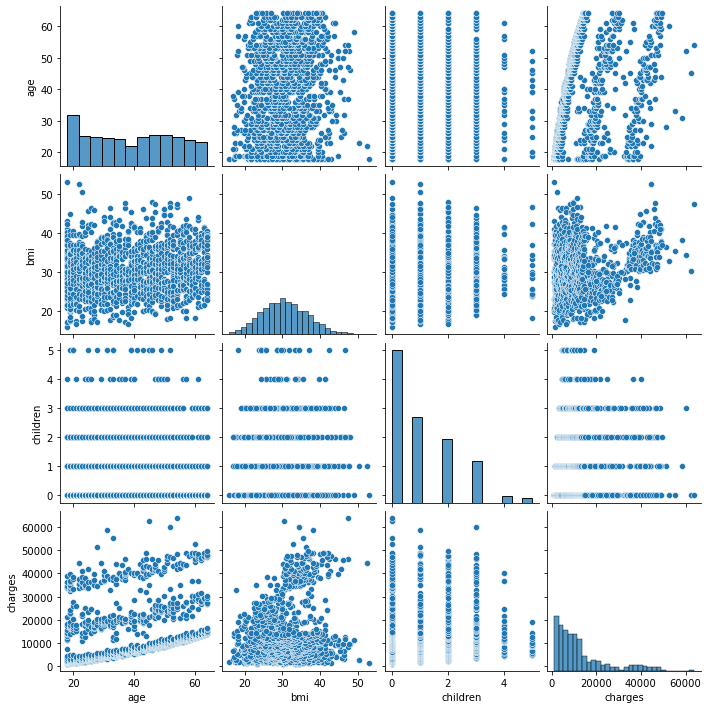

In [29]:
sns.pairplot(df)

<AxesSubplot:>

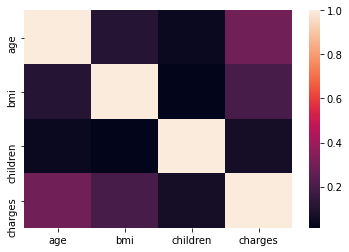

In [27]:
sns.heatmap(df.corr())

In [64]:
agerange = [17, 25, 40, 55, 65]
cat = ['17-25', '25-40', '40-55', '55-65']
df['age category'] = pd.cut(df.age, agerange, labels=cat, ordered=True)
df.head()

,age,sex,bmi,children,smoker,region,charges,age category
940,18,male,23.21,0,no,southeast,1121.8739,17-25
808,18,male,30.14,0,no,southeast,1131.5066,17-25
1244,18,male,33.33,0,no,southeast,1135.9407,17-25
663,18,male,33.66,0,no,southeast,1136.3994,17-25
22,18,male,34.10,0,no,southeast,1137.0110,17-25


In [67]:
bmirange = [10, 18.5, 25, 30, 40]
bmicat = ['under', 'healthy', 'over', 'obese']
df['bmi category'] = pd.cut(df.bmi, bmirange, labels=bmicat, ordered=True)
df.head()

,age,sex,bmi,children,smoker,region,charges,age category,bmi category
940,18,male,23.21,0,no,southeast,1121.8739,17-25,healthy
808,18,male,30.14,0,no,southeast,1131.5066,17-25,obese
1244,18,male,33.33,0,no,southeast,1135.9407,17-25,obese
663,18,male,33.66,0,no,southeast,1136.3994,17-25,obese
22,18,male,34.10,0,no,southeast,1137.0110,17-25,obese


## Exploring age column

In [65]:
df.groupby('age category').charges.agg(['min', 'max', 'mean'])

,min,max,mean
age category,,,
17-25,1121.8739,44501.39820,9087.015807
25-40,2302.3000,58571.07448,11096.679994
40-55,5699.8375,63770.42801,15515.617320
55-65,10577.0870,52590.82939,18795.993816


The average of charges is highest for seniors (age 55-65), and the lowest for youth (age 17-25).

<AxesSubplot:xlabel='age', ylabel='charges'>

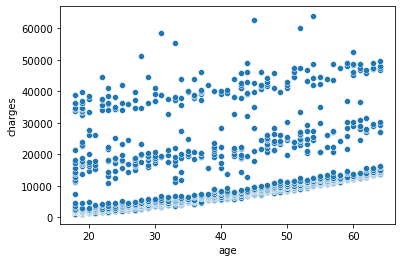

In [66]:
sns.scatterplot(data=df, x='age', y='charges')

Indicates a linear relationship between age and charges. As age increase, the charges increase

#### age vs charges

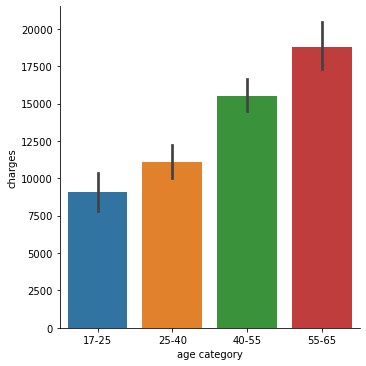

In [52]:
sns.catplot(x='age category', y='charges', kind='bar', data=df)

Highest charges in seniors category (age 55-65), and lowest in young adult category (age 17-25).

#### age, charges, smoker

<AxesSubplot:xlabel='age', ylabel='charges'>

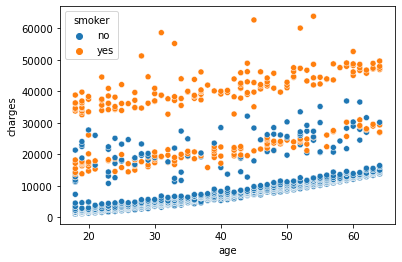

In [53]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')

This kind of indicating a relationship between charges, age, and smoker.

#### age, charges, sex

<AxesSubplot:xlabel='age', ylabel='charges'>

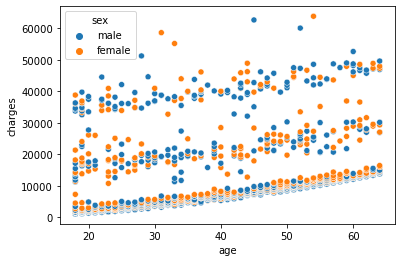

In [54]:
sns.scatterplot(data=df, x='age', y='charges', hue='sex')

Spread equally, meaning there is no relationship between sex, age, and charges

#### age, charges, region

<AxesSubplot:xlabel='age', ylabel='charges'>

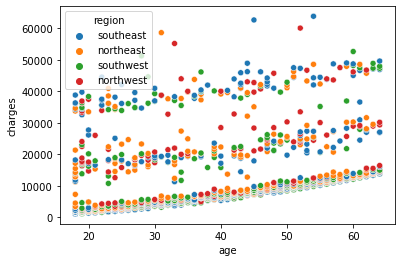

In [57]:
sns.scatterplot(data=df, x='age', y='charges', hue='region')

This does not show relationship between age, charges, and region.

#### age, charges, BMI

<AxesSubplot:xlabel='age', ylabel='charges'>

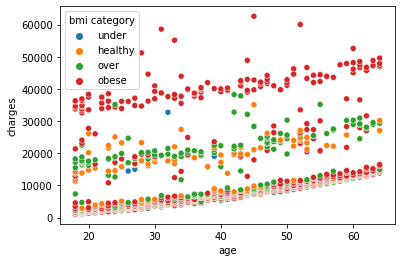

In [68]:
sns.scatterplot(data=df, x='age', y='charges', hue='bmi category')

This somewhat shows a relationship between age, charges, and BMI.

## Exploring sex column

In [41]:
df.groupby('sex').charges.agg(['min', 'max', 'mean'])

,min,max,mean
sex,,,
female,1607.5101,63770.42801,12569.578844
male,1121.8739,62592.87309,13956.751178


The average of charges is higher for male than female.

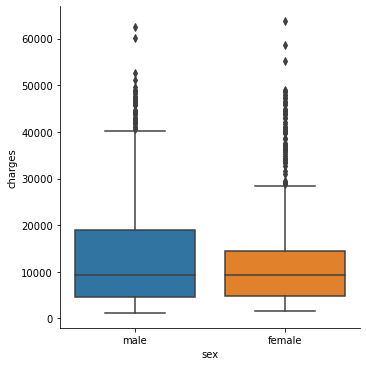

In [51]:
sns.catplot(y='charges', x='sex', kind='box', data=df)

#### sex, charges

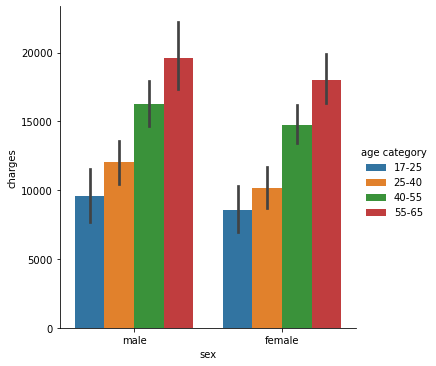

In [48]:
sns.catplot(x='sex', y='charges', hue='age category', kind='bar', data=df)

Indicates that the highest charges is seniors male with age range from 55-65. The highest charges in female category is also seniors female with age range from 55-65. This is consistent with the previous analysis, that seniors have the highest charges.

#### sex, charges, region

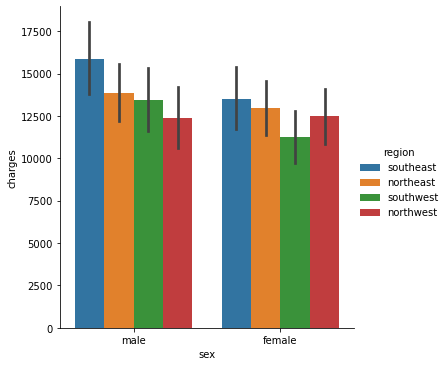

In [60]:
sns.catplot(data=df, x='sex', y='charges', hue='region', kind='bar')

It does not seem to show a strong relationship.

#### sex, charges, smoker

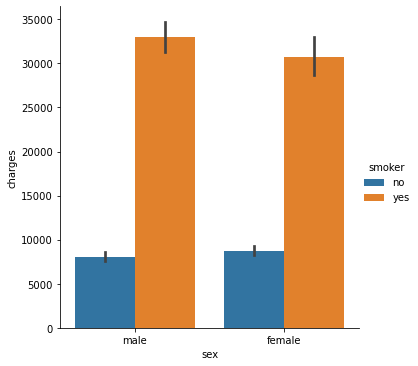

In [62]:
sns.catplot(data=df, x='sex', y='charges', hue='smoker', kind='bar')

This shows a very strong relationship, that smoker has higher charges compare to non smoker. This is consistent with both sex.

#### sex, charges, BMI

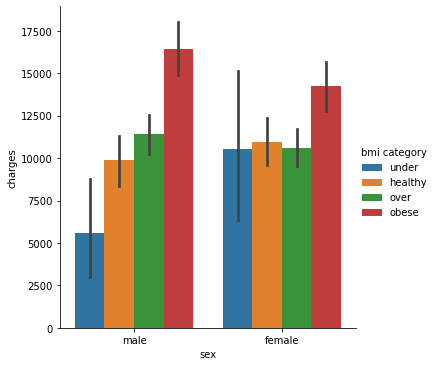

In [69]:
sns.catplot(data=df, x='sex', y='charges', hue='bmi category', kind='bar')

For both sex, this shows those classified as obese (BMI 30-40) have highest charges.

#### sex, charges, children

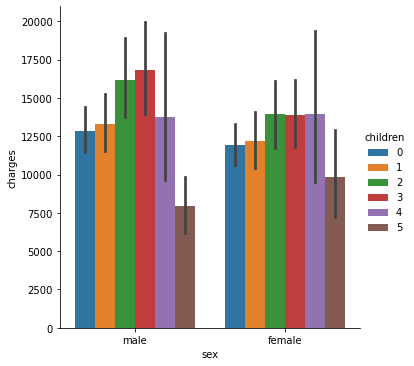

In [70]:
sns.catplot(data=df, x='sex', y='charges', hue='children', kind='bar')

This does not seem to indicate anything meaningful.